In [1]:
# Import statements

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from textblob import TextBlob

In [2]:
df = pd.read_csv("MLS_clean_data.csv")

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df.head()

In [3]:
df.drop(['Unnamed: 0'],axis =1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115749 entries, 0 to 115748
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MLS No                     115749 non-null  object 
 1   How Sold                   115749 non-null  object 
 2   Zip                        115749 non-null  object 
 3   City                       115749 non-null  object 
 4   Address                    115749 non-null  object 
 5   Input Date                 115749 non-null  object 
 6   List Date                  115749 non-null  object 
 7   Pending Date               115749 non-null  object 
 8   Closing Date               115749 non-null  object 
 9   List Price                 115749 non-null  float64
 10  Sold Price                 115749 non-null  float64
 11  BR                         115749 non-null  float64
 12  Bth                        115749 non-null  float64
 13  SqFt                       11

In [5]:
#Converting date variable to datetime var
date_vars = ['Input Date', 'List Date', 'Pending Date', 'Closing Date']

for var in date_vars:
    df[var] = pd.to_datetime(df[var], yearfirst=True)

In [23]:
#Converting 'How Sold' to categorical data
df['How Sold'] = df['How Sold'].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115749 entries, 0 to 115748
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   MLS No                     115749 non-null  object        
 1   How Sold                   115749 non-null  category      
 2   Zip                        115749 non-null  object        
 3   City                       115749 non-null  object        
 4   Address                    115749 non-null  object        
 5   Input Date                 115749 non-null  datetime64[ns]
 6   List Date                  115749 non-null  datetime64[ns]
 7   Pending Date               115749 non-null  datetime64[ns]
 8   Closing Date               115749 non-null  datetime64[ns]
 9   List Price                 115749 non-null  float64       
 10  Sold Price                 115749 non-null  float64       
 11  BR                         115749 non-null  float64 

In [7]:
#Counting the number of adjectives in public remarks
from textblob import TextBlob

def get_adjectives(text):
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag.startswith("JJ")]

df['adjectives_public'] = df['Public Remarks'].apply(lambda x: get_adjectives(str(x)))

In [8]:
df['adjectives_public'].head()

0                    [handy-people, single, habitable]
1                                        [good, great]
2                    [great, great, large, pre-opened]
3              [special, nice, upcoming, huge, public]
4    [short, east, much, great, laundry, extra, great]
Name: adjectives_public, dtype: object

In [12]:
#creating word count for the number of adjectives
df['public_adj_num'] = df['adjectives_public'].apply(lambda t: len(t))

In [ ]:
#Removing Punctuation

In [9]:
df['Public Remarks'] = df['Public Remarks'].apply(lambda t:re.sub("[^-9A-Za-z ]", "" , str(t)))

In [10]:
df['Public Remarks'].head()

0    attention contractors investors and handy-peop...
1    seller has plans and city approval for a  bedr...
2    fixer property needs lots of work but has grea...
3    contractors special nice bungalow located in u...
4    no short sale or reo east oakland fixer with m...
Name: Public Remarks, dtype: object

In [13]:
#Removing sttop words
nltk.download('stopwords')
import textcleaner as tc

df['Public Remarks'] = df['Public Remarks'].apply(lambda t: tc.document(str(t)).remove_stpwrds())

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df['Public Remarks'].head()

0    attention contractors investors handy-people s...
1    seller plans city approval bedroom bath home g...
2    fixer property needs lots work great potential...
3    contractors special nice bungalow located upco...
4    short sale reo east oakland fixer much potenti...
Name: Public Remarks, dtype: object

In [ ]:
#Counting the number of words

In [16]:
df['Public Remarks'] = df['Public Remarks'].apply(lambda t: str(t).split())

In [17]:
df['word_count_public'] = df['Public Remarks'].apply(lambda t: len(t))

In [18]:
df['word_count_public'].head()

0    10
1    13
2    23
3    23
4    27
Name: word_count_public, dtype: int64

In [20]:
df['public_adj_num'].head()

0    3
1    2
2    4
3    5
4    7
Name: public_adj_num, dtype: int64

In [25]:
#Same steps for private remarks

#Extracting adjectives
df['adjectives_private'] = df['Confidential Remarks 1000'].apply(lambda x: get_adjectives(str(x)))

#Counting the number of adjectives
df['private_adj_num'] = df['adjectives_private'].apply(lambda t: len(t))

#Removing punctuation
df['Private Remarks'] = df['Confidential Remarks 1000'].apply(lambda t:re.sub("[^-9A-Za-z ]", "" , str(t)))

#Spliting to a list
df['Private Remarks'] = df['Private Remarks'].apply(lambda t: t.split())

#Counting the number of words
df['word_count_private'] = df['Private Remarks'].apply(lambda t: len(t))



In [28]:
df['private_adj_num'].head()

0    8
1    1
2    6
3    6
4    0
Name: private_adj_num, dtype: int64

In [29]:
df['word_count_private'].head()

0    29
1     9
2    33
3    25
4    18
Name: word_count_private, dtype: int64

<AxesSubplot:xlabel='Picture_cat', ylabel='word_count_public'>

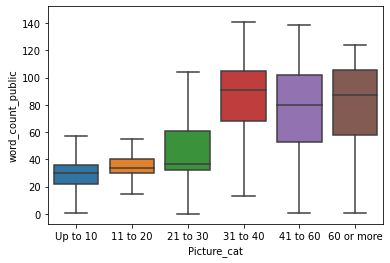

In [35]:
sns.boxplot(data = df, x = 'Picture_cat', y = 'word_count_public', fliersize = 0)

<AxesSubplot:xlabel='Picture_cat', ylabel='word_count_private'>

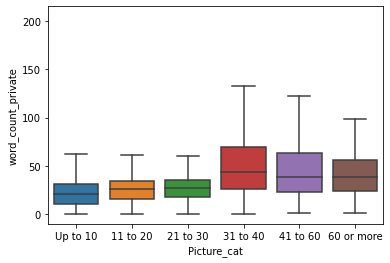

In [37]:
sns.boxplot(data = df, x = 'Picture_cat', y = 'word_count_private', fliersize = 0)

<AxesSubplot:xlabel='word_count_private', ylabel='Sold Price'>

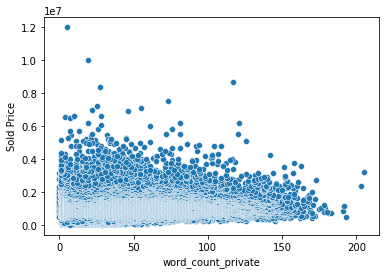

In [38]:
sns.scatterplot(data = df, x='word_count_private', y='Sold Price')

<AxesSubplot:xlabel='word_count_public', ylabel='Sold Price'>

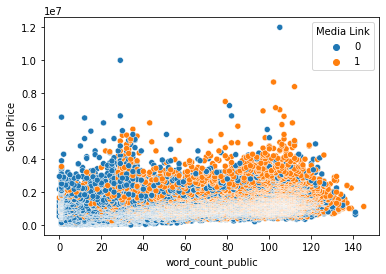

In [42]:
sns.scatterplot(data = df, x='word_count_public', y='Sold Price', hue='Media Link')

<AxesSubplot:xlabel='word_count_public', ylabel='days_on_market'>

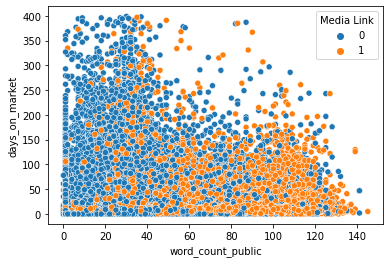

In [41]:
sns.scatterplot(data = df, x='word_count_public', y='days_on_market', hue='Media Link')

In [43]:
df['month_sold'] = df['Closing Date'].dt.month

In [44]:
#Converting 'year_sold' to categorical data
df['year_sold'] = df['year_sold'].astype('category')

In [45]:
#Converting 'month_sold' to categorical data
df['month_sold'] = df['month_sold'].astype('category')

In [46]:
df.columns

Index(['MLS No', 'How Sold', 'Zip', 'City', 'Address', 'Input Date',
       'List Date', 'Pending Date', 'Closing Date', 'List Price', 'Sold Price',
       'BR', 'Bth', 'SqFt', 'Lot SqFt', 'Garage (Y/N)', 'Age', 'Picture Count',
       'Confidential Remarks 1000', 'Public Remarks', 'Media Link',
       'days_on_market', 'days_on_MLS', 'year_sold', 'Sold', 'Picture_cat',
       'adjectives_public', 'public_adj_num', 'word_count_public',
       'adjectives_private', 'private_adj_num', 'Private Remarks',
       'word_count_private', 'month_sold'],
      dtype='object')

In [77]:
#Defining X variable for regression

x_vars = ['BR', 'BR_squared', 'Bth', 'SqFt', 'Lot SqFt', 'Garage (Y/N)', 'Age', 'How Sold', 'year_sold', 'month_sold', 'Media Link', 'Picture Count'
         , 'word_count_public', 'word_count_private', 'private_adj_num', 'public_adj_num']

In [90]:
X = df[x_vars]

In [91]:
X.shape

(115740, 16)

In [92]:
X = pd.get_dummies(X, drop_first=True)

In [93]:
X.columns

Index(['BR', 'BR_squared', 'Bth', 'SqFt', 'Lot SqFt', 'Garage (Y/N)', 'Age',
       'Media Link', 'Picture Count', 'word_count_public',
       'word_count_private', 'private_adj_num', 'public_adj_num',
       'How Sold_Conventional', 'How Sold_Government', 'How Sold_Other',
       'year_sold_2011', 'year_sold_2012', 'year_sold_2013', 'year_sold_2014',
       'year_sold_2015', 'year_sold_2016', 'year_sold_2017', 'year_sold_2018',
       'year_sold_2019', 'year_sold_2020', 'year_sold_2021', 'month_sold_2',
       'month_sold_3', 'month_sold_4', 'month_sold_5', 'month_sold_6',
       'month_sold_7', 'month_sold_8', 'month_sold_9', 'month_sold_10',
       'month_sold_11', 'month_sold_12'],
      dtype='object')

In [94]:
X.shape

(115740, 38)

In [95]:
y1 = df['Sold Price']

In [96]:
y2 = df['days_on_market']

In [97]:
from sklearn.model_selection import train_test_split

#Dividing the data to train and test
X_train, X_test, y1_train, y1_test = train_test_split(X,y1,test_size=0.25,random_state=42)

In [98]:
from sklearn.linear_model import LinearRegression

# create linear regression object
lr = LinearRegression()

# fit linear regression
lr.fit(X_train, y1_train)

LinearRegression()

In [99]:
lr.score(X_train,y1_train)

0.7022973547318729

In [100]:
cdf = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficients'])
print(cdf)

                        Coefficients
BR                      39648.848918
BR_squared             -10258.257810
Bth                     48079.352616
SqFt                      390.039532
Lot SqFt                   -0.000060
Garage (Y/N)            57385.197858
Age                      1910.248134
Media Link              62330.171460
Picture Count            1602.525877
word_count_public         252.734212
word_count_private       -476.402209
private_adj_num          -672.877960
public_adj_num           5778.591582
How Sold_Conventional   -9561.373000
How Sold_Government   -124241.944147
How Sold_Other          -3656.231274
year_sold_2011         -41495.041436
year_sold_2012         -26381.016540
year_sold_2013          58332.222063
year_sold_2014         120292.282466
year_sold_2015         194633.850148
year_sold_2016         238388.836925
year_sold_2017         282456.287991
year_sold_2018         331493.845646
year_sold_2019         310784.717699
year_sold_2020         380839.894251
y

<AxesSubplot:xlabel='BR', ylabel='Sold Price'>

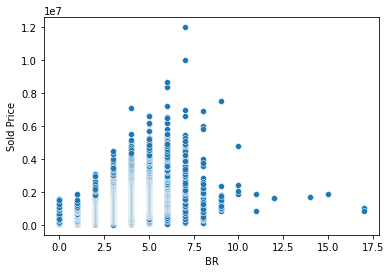

In [68]:
sns.scatterplot(x='BR', y='Sold Price', data = df)

In [69]:
df[df['BR'] > 10]

,MLS No,How Sold,Zip,City,Address,Input Date,List Date,Pending Date,Closing Date,List Price,...,Sold,Picture_cat,adjectives_public,public_adj_num,word_count_public,adjectives_private,private_adj_num,Private Remarks,word_count_private,month_sold
15448,40675438,Other,94546,castrovaey,17926 apricot way,2014-09-26 12:54:00,2014-09-17,2015-03-13,2015-04-10,1050000.0,...,1,Up to 10,"[potential, rental, other, possible, possible,...",7,32,"[livin, rental, other, next, real]",5,"[formrly, asstd, livin, facility, potentl, for...",40,4
16584,40683358,Cash,94705,berkeley,3028 regent st,2015-01-06 15:11:00,2015-01-06,2015-02-13,2015-05-21,1598000.0,...,1,11 to 20,"[great, assisted, separate, private, private, ...",6,28,[open],1,"[please, call, jinny, to, arrange, showings, a...",20,5
16587,ML81445950,Cash,94705,berkeley,3028 regent street,2015-01-05 16:00:00,2015-01-06,2015-02-16,2015-05-21,1598000.0,...,1,21 to 30,"[great, assisted, shower, private, private, am...",7,30,"[@, open, 24-hour, direct, lockbox]",5,"[please, contact, jinny, to, arrange, all, sho...",35,5
16617,40676736,Cash,94709,berkeley,1770 la loma ave,2014-10-08 11:34:00,2014-10-07,2014-10-24,2014-11-14,995000.0,...,1,11 to 20,"[historic, full, potential, grand, bay, top]",6,32,"[open, 10:00-1:00., 1:00-3:00., 3:00-5:00, 10:...",9,"[open, thurs, 9, -, sun, -, tues, -, thurs, -,...",27,11
16742,40694078,Conventional,94610,oakland,390 euclid ave,2015-04-10 11:08:00,2015-04-10,2015-05-04,2015-06-04,1898898.0,...,1,21 to 30,"[euclid, exquisite, perfect, enthusiastic, gra...",7,27,[],0,"[sq, ft, of, home, and, lot, size, not, verifi...",16,6
30126,40573437,Conventional,94704,berkeley,2504 dana st,2012-05-09 19:03:00,2012-05-09,2012-05-14,2012-09-18,950000.0,...,1,Up to 10,"[huge, few, fixer-upper, as-is, mls, interested]",6,20,"[408-710-4226., berkeley, deferred, mls, inter...",5,"[do, not, disturb, tenants, shown, by, appoint...",29,9
30199,40586168,Other,94703,berkeley,1545 dwight way,2012-08-20 10:43:00,2012-08-20,2012-10-15,2013-01-18,1199000.0,...,1,Up to 10,"[classic, victorian, many, original, storied, ...",8,25,"[third, legal, unitl, new]",4,"[currently, the, third, floor, is, not, legal,...",29,1
72908,40912830,Cash,94704,berkeley,2225 blake street,2020-07-17 12:25:00,2020-07-17,2020-08-10,2020-08-18,2100000.0,...,1,21 to 30,"[x, uc, downtown, available, beautiful, upper,...",20,92,"[great, 415-254-0711]",2,"[call, ted, anytime, to, discuss, this, great,...",10,8
100125,40800712,Conventional,94705,berkeley,3028 regent st,2017-10-15 12:40:00,2017-10-15,2017-11-07,2018-01-05,1895000.0,...,1,21 to 30,"[large, rare, convenient, spacious, updated, e...",15,44,"[alarmed, public, duplex, available]",4,"[alarmed, call, agent, wadvanced, notice, for,...",42,1


In [72]:
#Removing outliers - homes witth more than 10 bedrooms
df = df[df['BR']<11]

In [73]:
df.shape

(115740, 34)

In [74]:
# Adding a non-linear term for bedrooms since the coefficient on bedrooms is negative
df['BR_squared'] = df['BR']*df['BR']

<ipython-input-74-bf14ac967eb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BR_squared'] = df['BR']*df['BR']


In [75]:
df['BR_squared'].head()

0    1.0
1    1.0
2    1.0
3    4.0
4    1.0
Name: BR_squared, dtype: float64

In [76]:
df['BR'].head()

0    1.0
1    1.0
2    1.0
3    2.0
4    1.0
Name: BR, dtype: float64

In [104]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y1_train, X_train)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Sold Price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     5386.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:27:04   Log-Likelihood:            -1.2107e+06
No. Observations:               86805   AIC:                         2.422e+06
Df Residuals:                   86766   BIC:                         2.422e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.387e+